# Frequency and Distribution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# To recall, this is the code to mimic the roll dice game for 50 times

die = pd.DataFrame([1, 2, 3, 4, 5, 6])   # vector columna con indice "0"   > la única columna tiene índice 0 por defecto.
trial = 50 # intentos                
results = [die.sample(2, replace=True) # Se toman 2 muestras aleatorias + replace=True permite la repetición de valores (cada lanzamiento es independiente)
          .sum().loc[0] # se suman los valores  + .loc[0] tiene 2 parámetros. En este caso loc = loc[0] se está reasignando a su primer elemento.
           for i in range(trial)]      # Cantidad de iteraciones

In [3]:
print(results)

[10, 12, 9, 2, 3, 9, 8, 12, 11, 9, 11, 9, 6, 9, 4, 9, 5, 7, 7, 6, 3, 8, 11, 6, 6, 9, 11, 6, 4, 5, 8, 7, 6, 8, 5, 11, 7, 10, 6, 2, 10, 9, 4, 6, 4, 6, 9, 11, 6, 8]


In [4]:
# This is the code for summarizing the results of sum of faces by frequency

freq = pd.DataFrame(results)[0].value_counts()  # la única columna tiene índice 0 por defecto  +  [0] indexar elementos + Conteo de elementos
sort_freq = freq.sort_index()   #  ordena los resultados por el valor del dado, en lugar de por su frecuencia.
print(sort_freq)

0
2      2
3      2
4      4
5      3
6     10
7      4
8      5
9      9
10     3
11     6
12     2
Name: count, dtype: int64


<Axes: xlabel='0'>

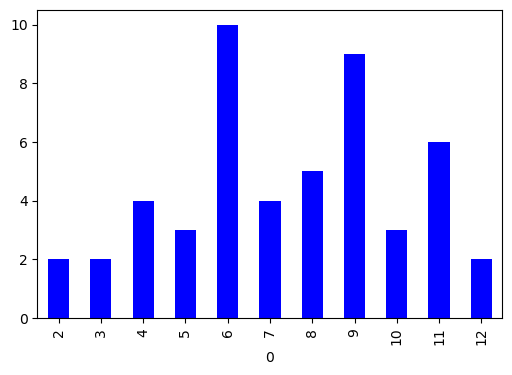

In [5]:
#plot the bar chart base on the result

sort_freq.plot(kind='bar', color='blue', figsize=(6, 4))

## Relative Frequency

<Axes: xlabel='0'>

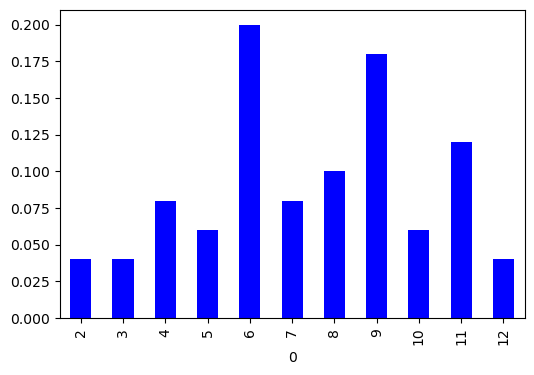

In [6]:
# Using relative frequency, we can rescale the frequency so that we can compare results from different number of trials
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(6, 4))

<Axes: xlabel='0'>

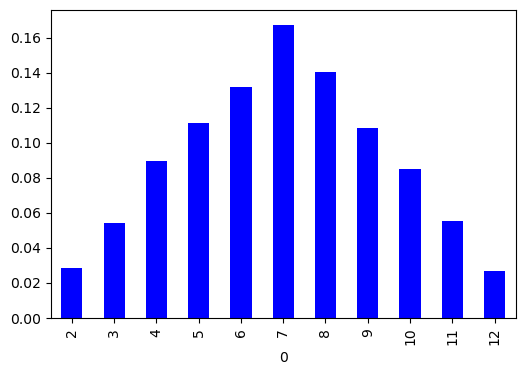

In [7]:
# Let us try to increase the number of trials to 10000, and see what will happen...
trial = 10000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]
freq = pd.DataFrame(results)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq/trial
relative_freq.plot(kind='bar', color='blue', figsize=(6, 4))

**We can see that with more trials, the result looks more and more stable, and this is very close to a probability distribution.**

## Expectation and Variance of a distribution

In [8]:
# assume that we have fair dice (dados justos), which means all faces will be shown with equal probability
# then we can say we know the 'Distribtuion' of the random variable - sum_of_dice

index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] # es el resulado de la suma de los 2 dados ( alternativas posibles), el 1 no existe
X_distri = pd.DataFrame(index) 
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]  # simula la distribución normal en terminos absolutos
X_distri['Prob'] = X_distri['Prob']/36    #  36 combinaciones posibles
X_distri # distribución normal asociada a frecuencia de probabilidades

,0,Prob
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


In [9]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()

In [10]:
print(mean, var)

5.0 5.833333333333334


## Empirical  mean and variance

In [11]:
# if we calculate mean and variance of outcomes (with high enough number of trials, eg 20000)...
trial = 20000
results = [die.sample(2, replace=True).sum().loc[0] for i in range(trial)]

In [12]:
#print the mean and variance of the 20000 trials
results = pd.Series(results)
print(results.mean(), results.var())

7.00255 5.884437719385723
